<a href="https://colab.research.google.com/github/Sunil260/Face-Emotional-Analysis/blob/main/faceEmotionalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Emotional Analysis To Produce a Song/Playlist/Genre Suggestion
**Plan To Use PreTreained model then freeze the base of the model and train and additional 2 layers for emotional analysis. **


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download "jonathanoheix/face-expression-recognition-dataset"

#folder_path = '../input/face-expression-recognition-dataset/images/'

 99% 119M/121M [00:05<00:00, 23.0MB/s]
100% 121M/121M [00:05<00:00, 21.9MB/s]


In [ ]:
! unzip "face-expression-recognition-dataset"

In [19]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
keras = tf.keras
layers = keras.layers
models = keras.models


In [11]:
!ls
data_dir = "./images/train"
validation_dir = "./images/validation"

batch_size = 32
img_size = 48
!pwd

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  shuffle=True,
  batch_size=batch_size,
  image_size=(img_size, img_size))

#datasets loaded completed



face-expression-recognition-dataset.zip  images  kaggle.json  sample_data
/content
Found 28821 files belonging to 7 classes.
Using 23057 files for training.
Found 7066 files belonging to 7 classes.


In [13]:
CATEGORIES = ['angry','disgust','fear','happy','neutral','sad','suprise']

train_labels = train_ds.class_names
validation_labels = validation_ds.class_names



['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


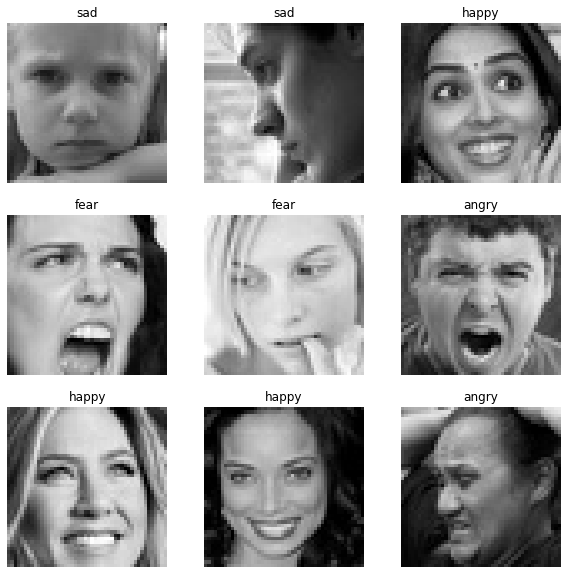

In [15]:
#plotting the images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_labels[labels[i]])
    plt.axis("off")

In [16]:
#Check the tensor shapes
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 48, 48, 3)
(32,)


In [24]:
#Build the model
num_classes = 7
model = models.Sequential()

#First layer to normalize the RGB chanels 
model.add(layers.Rescaling(1./255))

#3 layer stack for convlutional block
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())

#Flatten for dense layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))


In [28]:
#Training the model
model.compile(
    optimizer= 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']
)



In [29]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)


Epoch 1/10
721/721 [==============================] - 68s 92ms/step - loss: 1.6605 - accuracy: 0.3391 - val_loss: 1.5188 - val_accuracy: 0.4265
Epoch 2/10
721/721 [==============================] - 68s 94ms/step - loss: 1.4441 - accuracy: 0.4449 - val_loss: 1.3994 - val_accuracy: 0.4663
Epoch 3/10
721/721 [==============================] - 67s 93ms/step - loss: 1.3284 - accuracy: 0.4897 - val_loss: 1.3583 - val_accuracy: 0.4785
Epoch 4/10
721/721 [==============================] - 67s 93ms/step - loss: 1.2491 - accuracy: 0.5242 - val_loss: 1.3327 - val_accuracy: 0.4914
Epoch 5/10
721/721 [==============================] - 68s 94ms/step - loss: 1.1887 - accuracy: 0.5477 - val_loss: 1.2660 - val_accuracy: 0.5185
Epoch 6/10
721/721 [==============================] - 68s 95ms/step - loss: 1.1316 - accuracy: 0.5725 - val_loss: 1.2567 - val_accuracy: 0.5283
Epoch 7/10
721/721 [==============================] - 69s 96ms/step - loss: 1.0756 - accuracy: 0.5963 - val_loss: 1.2824 - val_accuracy: